**OBS: Fiz todos os comentários em inglês para dar uma testada nos meus conhecimentos**

**Importing Pandas library and data**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados&colunas.csv')
df.head()

,Height[m],Weight[Kg],HDI,Population[Mi],Region
0,1.62,56.0,0.632,164.68,eastern
1,1.65,65.0,0.645,1380.00,eastern
2,1.66,59.0,0.733,25.77,eastern
3,1.68,71.5,0.810,32.36,eastern
4,1.68,74.7,0.737,3.27,eastern


**Setting 'eastern' as 0 and 'western' as 1**

In [ ]:
d = {'eastern': 0,'western': 1}

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados&colunas.csv')
df['Region'] = df['Region'].map(d)
df.head()

,Height[m],Weight[Kg],HDI,Population[Mi],Region
0,1.62,56.0,0.632,164.68,0
1,1.65,65.0,0.645,1380.00,0
2,1.66,59.0,0.733,25.77,0
3,1.68,71.5,0.810,32.36,0
4,1.68,74.7,0.737,3.27,0


**Setting matrix Y with labels ('eastern' or 'western')**

In [ ]:
y = df['Region'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

**Setting matrix X with features**


In [ ]:
X = df.iloc[:,:4].values #all rows but only columns from 0 to 3
X[:5] #ispection of first 5 rows

array([[1.6200e+00, 5.6000e+01, 6.3200e-01, 1.6468e+02],
       [1.6500e+00, 6.5000e+01, 6.4500e-01, 1.3800e+03],
       [1.6600e+00, 5.9000e+01, 7.3300e-01, 2.5770e+01],
       [1.6800e+00, 7.1500e+01, 8.1000e-01, 3.2360e+01],
       [1.6800e+00, 7.4700e+01, 7.3700e-01, 3.2700e+00]])

**Installing MLXtend and Showing Graphs**

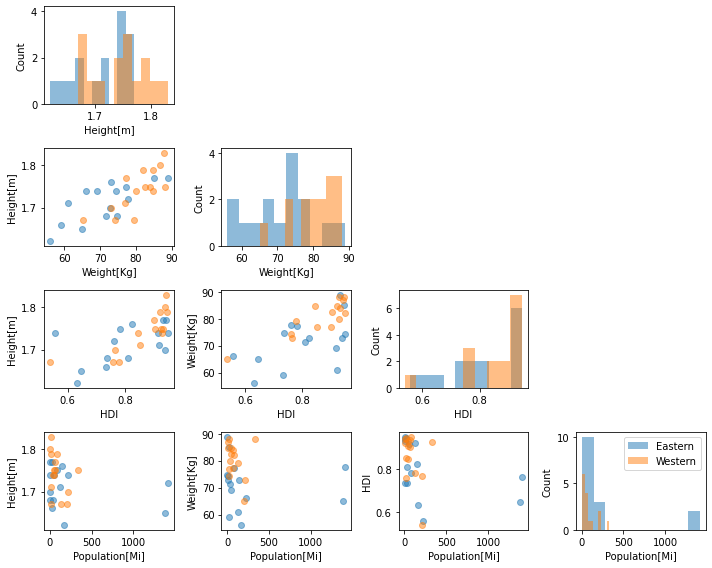

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

names = df.columns[:4]

fig, axes = scatterplotmatrix(X[y==0], figsize=(10,8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Eastern', 'Western'])
plt.show()

**Splitting Dataset into Train and Test**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
np.bincount(y_train)

array([12, 12])

**K-Nearest Neighbor Classifier with 2 Features on Train Subset**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


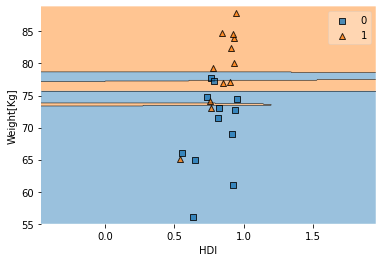

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_model = KNeighborsClassifier(n_neighbors=3) #K=3
knn_model.fit(X_train[:, [2,1]], y_train) #Get all rows but only feature 1 and 2 (Weight[Kg] and HDI)
plot_decision_regions(X_train[:, [2,1]], y_train, knn_model)
plt.xlabel('HDI')
plt.ylabel('Weight[Kg]')
#plt.savefig('images/decision.pdf') #save graph
plt.show()

**Normalizing Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std[:5]

array([[-0.21401291, -1.73834222,  0.86954064, -0.16569549],
       [-0.21401291,  0.32382464,  0.30529001, -0.45545314],
       [-0.42802583, -0.21749416,  1.0271989 , -0.49124101],
       [ 0.64203874,  1.01980596,  0.74507359, -0.38085458],
       [ 1.07006456,  0.33671318,  0.72018018, -0.3308703 ]])

**Applying KNN with 3 Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

**Printing Prediction and Test Results**

In [ ]:
y_pred = knn_model.predict(X_test_std)
print(y_pred)
print(y_test)

[1 1 1 0 1 1]
[1 1 0 0 0 1]


**Printing KNN accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) #66%

0.6666666666666666